In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
data_path = r"time_New_FFFinal_formatted_Figi.csv"
data = pd.read_csv(data_path, parse_dates=['time_series'], index_col='time_series')

# Select the target variable
sea_level = data['Sea Level']



# Split data into training and test sets
train_size = int(len(sea_level) * 0.8)
train, test = sea_level[:train_size], sea_level[train_size:]

# LSTM Model
def lstm_model(train, test):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_train = scaler.fit_transform(train.values.reshape(-1, 1))
    scaled_test = scaler.transform(test.values.reshape(-1, 1))

    # Prepare the data for LSTM
    X_train, y_train = [], []
    for i in range(60, len(scaled_train)):
        X_train.append(scaled_train[i-60:i])
        y_train.append(scaled_train[i])
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshape for LSTM [samples, time steps, features]
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    # Building the LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(25))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, batch_size=1, epochs=1)

    # Make predictions
    predictions = model.predict(X_train) # Changed to X_train here for prediction 
    
    # Inverse transform to get actual sea level values
    lstm_predictions = scaler.inverse_transform(predictions)
    

    # Calculate MAE and RMSE
    lstm_mae = mean_absolute_error(y_train, predictions) # Changed to y_train, predictions for MAE calculation
    lstm_rmse = np.sqrt(mean_squared_error(y_train, predictions)) # Changed to y_train, predictions for RMSE calculation


    return lstm_predictions, lstm_mae, lstm_rmse # Added return statement


# Run LSTM model
lstm_predictions, lstm_mae, lstm_rmse = lstm_model(train, test)

# Plotting actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(test.index, test, label='Actual Sea Level', color='blue')
# Use the training data index for plotting the predictions, since that's what the model was trained on
plt.plot(train.index[60:len(lstm_predictions)+60], lstm_predictions, label='LSTM Predictions', color='red')  
plt.title('Sea Level Predictions vs Actual (LSTM)')
plt.xlabel('Date')
plt.ylabel('Sea Level')
plt.legend()
plt.show()

# Print accuracy of the LSTM model at the end
print("LSTM MAE:", lstm_mae)
print("LSTM RMSE:", lstm_rmse)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_32460\790550269.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data['Sea Level (Normalized)'] = sea_level_scaled
c:\Users\ahmed\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0991
Epoch 2/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0094
Epoch 3/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0090
Epoch 4/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0081
Epoch 5/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0059
Epoch 6/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0054
Epoch 7/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0046
Epoch 8/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0048
Epoch 9/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0041
Epoch 10/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0045
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Mean Absolute Error (MAE): 1139.1788127290506
Root Mean Squared Error (RMSE): 2088.4332431673247


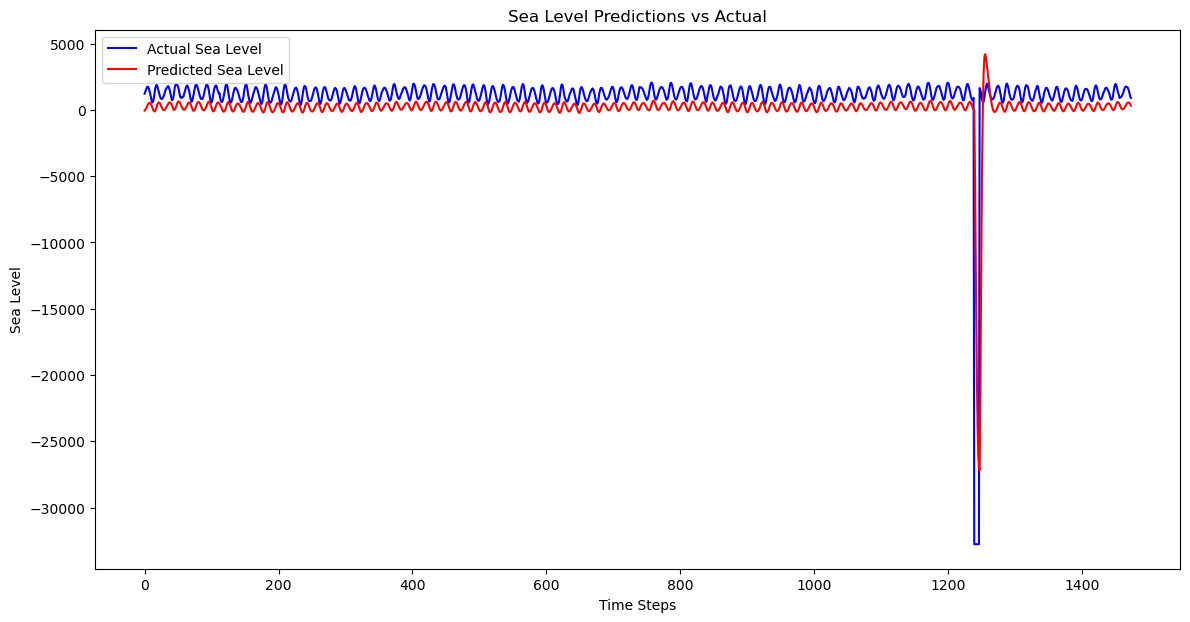

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the dataset
data_path = r"time_New_FFFinal_formatted_Figi.csv"  # Replace with your actual path
data = pd.read_csv(data_path, parse_dates=['time_series'], index_col='time_series')

# Step 1: Minimize dataset to one measurement per day (23:00:00)
daily_data = data.between_time("23:00", "23:00")

# Step 2: Normalize the 'Sea Level' column
sea_level = daily_data[['Sea Level']]
scaler = MinMaxScaler(feature_range=(0, 1))
sea_level_scaled = scaler.fit_transform(sea_level)
daily_data['Sea Level (Normalized)'] = sea_level_scaled

# Step 3: Sequential train-test split
train_size = int(len(sea_level_scaled) * 0.8)
train, test = sea_level_scaled[:train_size], sea_level_scaled[train_size:]

# Prepare data for LSTM
def create_lstm_dataset(data, time_steps=60):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i - time_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_steps = 60
X_train, y_train = create_lstm_dataset(train, time_steps)
X_test, y_test = create_lstm_dataset(test, time_steps)

# Reshape data for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Step 4: Build and train the LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(25))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=0.001)  # Using Adam instead of AdamW
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

model = build_lstm_model((X_train.shape[1], X_train.shape[2]))
model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1)

# Step 5: Predictions and evaluation
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

mae = mean_absolute_error(actual, predictions)
rmse = np.sqrt(mean_squared_error(actual, predictions))

# Print MAE and RMSE
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(actual, label='Actual Sea Level', color='blue')
plt.plot(predictions, label='Predicted Sea Level', color='red')
plt.title('Sea Level Predictions vs Actual')
plt.xlabel('Time Steps')
plt.ylabel('Sea Level')
plt.legend()
plt.show()


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Load the dataset
data_path = r"time_New_FFFinal_formatted_Figi.csv"  # Replace with your actual path
data = pd.read_csv(data_path, parse_dates=['time_series'], index_col='time_series')

# Step 1: Minimize dataset to one measurement per day (23:00:00)
daily_data = data.between_time("23:00", "23:00").copy()

# Step 2: Normalize all features including 'Sea Level'
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(daily_data)
scaled_data = pd.DataFrame(scaled_data, columns=daily_data.columns, index=daily_data.index)

# Select the 'Sea Level' column for prediction
sea_level_scaled = scaled_data[['Sea Level']]

# Step 3: Sequential train-test split
train_size = int(len(sea_level_scaled) * 0.8)
train, test = sea_level_scaled.values[:train_size], sea_level_scaled.values[train_size:]

# Prepare data for LSTM
def create_lstm_dataset(data, time_steps=60):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i - time_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_steps = 60
X_train, y_train = create_lstm_dataset(train, time_steps)
X_test, y_test = create_lstm_dataset(test, time_steps)

# Reshape data for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Step 4: Build and train the LSTM model with early stopping
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(32))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

model = build_lstm_model((X_train.shape[1], X_train.shape[2]))

# Early stopping
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=100, callbacks=[early_stopping], verbose=1)

# Step 5: Predictions and evaluation
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

mae = mean_absolute_error(actual, predictions)
rmse = np.sqrt(mean_squared_error(actual, predictions))

# Print MAE and RMSE
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(actual, label='Actual Sea Level', color='blue')
plt.plot(predictions, label='Predicted Sea Level', color='red')
plt.title('Sea Level Predictions vs Actual')
plt.xlabel('Time Steps')
plt.ylabel('Sea Level')
plt.legend()
plt.show()


Epoch 1/100


c:\Users\ahmed\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


190/190 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.1123
Epoch 2/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0089
Epoch 3/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0075
Epoch 4/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0067
Epoch 5/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0060
Epoch 6/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0061
Epoch 7/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0047
Epoch 8/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0045
Epoch 9/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0063
Epoch 10/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0044
Epoch 11/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0038
Epoch 12/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0035
Epoch 13/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0027
Epoch 14/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0035
Epoch 15/100
190/190 ━━━━━━━━━━━━━━━━━━━━

ValueError: non-broadcastable output operand with shape (1474,1) doesn't match the broadcast shape (1474,11)

Epoch 1/100


c:\Users\ahmed\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


190/190 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0730
Epoch 2/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0084
Epoch 3/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0070
Epoch 4/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0060
Epoch 5/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0059
Epoch 6/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0051
Epoch 7/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0056
Epoch 8/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0048
Epoch 9/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0036
Epoch 10/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0028
Epoch 11/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0047
Epoch 12/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0030
Epoch 13/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0036
Epoch 14/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0031
Epoch 15/100
190/190 ━━━━━━━━━━━━━━━━━━━━

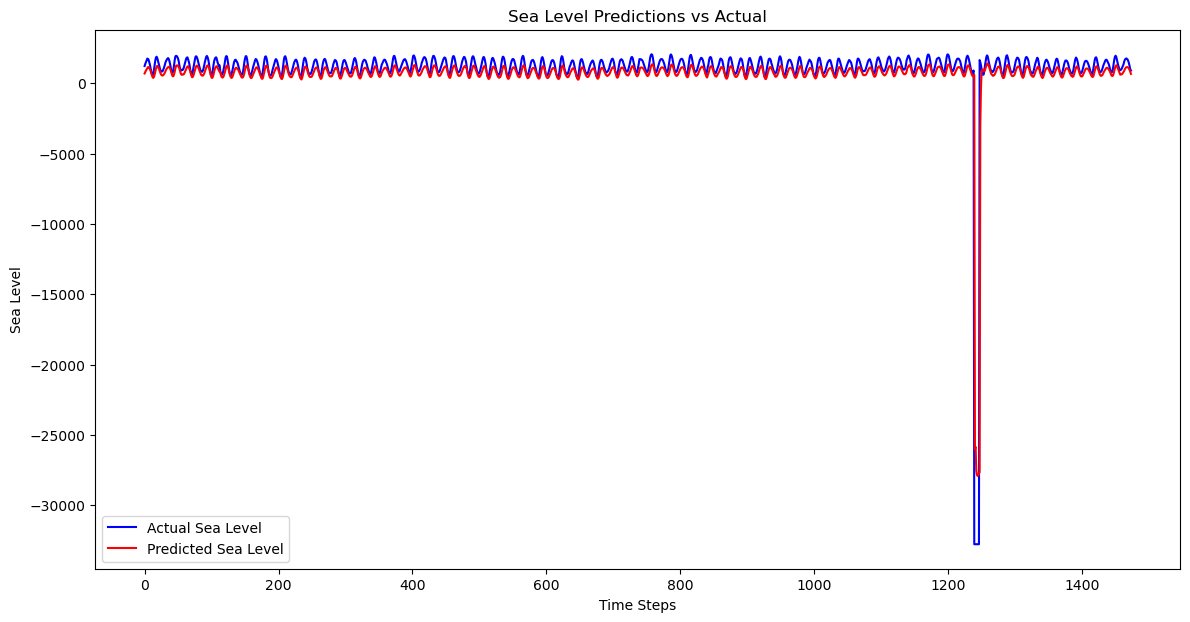

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Load the dataset
data_path = r"time_New_FFFinal_formatted_Figi.csv"  # Replace with your actual path
data = pd.read_csv(data_path, parse_dates=['time_series'], index_col='time_series')

# Step 1: Minimize dataset to one measurement per day (23:00:00)
daily_data = data.between_time("23:00", "23:00").copy()

# Step 2: Normalize all features including 'Sea Level'
scaler_all = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler_all.fit_transform(daily_data)
scaled_data = pd.DataFrame(scaled_data, columns=daily_data.columns, index=daily_data.index)

# Create a separate scaler for the 'Sea Level' column
sea_level_scaler = MinMaxScaler(feature_range=(0, 1))
sea_level_scaled = sea_level_scaler.fit_transform(daily_data[['Sea Level']])

# Step 3: Sequential train-test split
train_size = int(len(sea_level_scaled) * 0.8)
train, test = sea_level_scaled[:train_size], sea_level_scaled[train_size:]

# Prepare data for LSTM
def create_lstm_dataset(data, time_steps=60):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i - time_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_steps = 60
X_train, y_train = create_lstm_dataset(train, time_steps)
X_test, y_test = create_lstm_dataset(test, time_steps)

# Reshape data for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Step 4: Build and train the LSTM model with early stopping
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(32))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

model = build_lstm_model((X_train.shape[1], X_train.shape[2]))

# Early stopping
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=100, callbacks=[early_stopping], verbose=1)

# Step 5: Predictions and evaluation
predictions = model.predict(X_test)
predictions = sea_level_scaler.inverse_transform(predictions)
actual = sea_level_scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate evaluation metrics
mae = mean_absolute_error(actual, predictions)
rmse = np.sqrt(mean_squared_error(actual, predictions))

# Calculate accuracy as (1 - MAE / Mean of Actual Values)
accuracy = 1 - (mae / np.mean(actual))

# Print MAE, RMSE, and Accuracy
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Accuracy:", accuracy)

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(actual, label='Actual Sea Level', color='blue')
plt.plot(predictions, label='Predicted Sea Level', color='red')
plt.title('Sea Level Predictions vs Actual')
plt.xlabel('Time Steps')
plt.ylabel('Sea Level')
plt.legend()
plt.show()


In [5]:
# Normalize all features for better context
features = daily_data.values
scaler_features = MinMaxScaler()
scaled_features = scaler_features.fit_transform(features)

# Prepare data for multi-feature LSTM
def create_multi_feature_dataset(data, target_idx, time_steps=60):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i - time_steps:i, :])  # Use all features for X
        y.append(data[i, target_idx])       # Target is the specific feature index
    return np.array(X), np.array(y)

# Target is the 'Sea Level' column
target_idx = daily_data.columns.get_loc('Sea Level')

# Generate dataset
X_train, y_train = create_multi_feature_dataset(scaled_features[:train_size], target_idx)
X_test, y_test = create_multi_feature_dataset(scaled_features[train_size:], target_idx)

# Build an improved LSTM model
def build_improved_lstm(input_shape):
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.3))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# Train the model
model = build_improved_lstm((X_train.shape[1], X_train.shape[2]))
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
model.fit(X_train, y_train, batch_size=32, epochs=100, callbacks=[early_stopping], verbose=1)

# Predict and evaluate
predictions = model.predict(X_test)
predictions = sea_level_scaler.inverse_transform(predictions)
actual = sea_level_scaler.inverse_transform(y_test.reshape(-1, 1))

mae = mean_absolute_error(actual, predictions)
rmse = np.sqrt(mean_squared_error(actual, predictions))
accuracy = 1 - (mae / np.mean(actual))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Accuracy:", accuracy)


Epoch 1/100


c:\Users\ahmed\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


190/190 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - loss: 0.0667
Epoch 2/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0095
Epoch 3/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0087
Epoch 4/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0067
Epoch 5/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0055
Epoch 6/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0055
Epoch 7/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0051
Epoch 8/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0047
Epoch 9/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0041
Epoch 10/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0038
Epoch 11/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0025
Epoch 12/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0023
Epoch 13/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0040
Epoch 14/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0025
Epoch 15/100
190/190 ━━━━━━━━━━━━━━━━━━━━

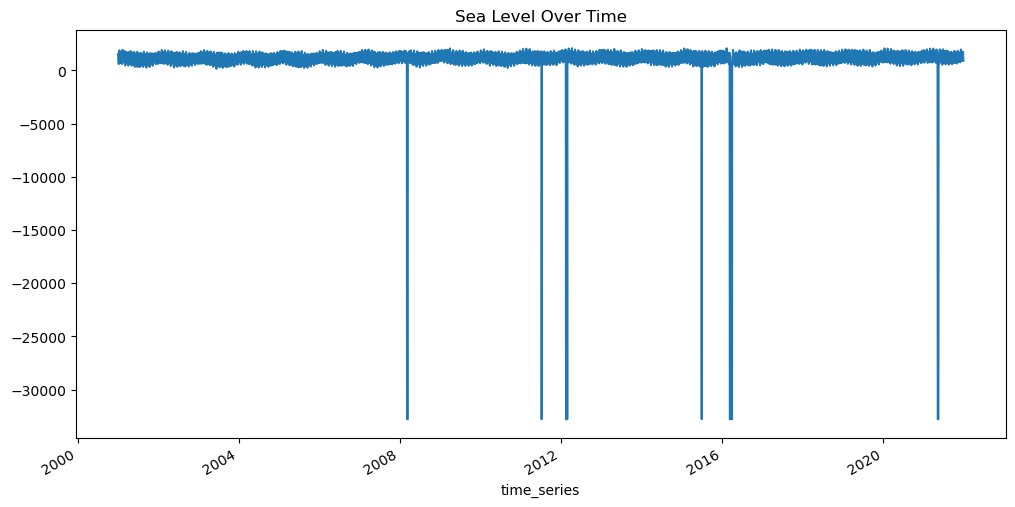

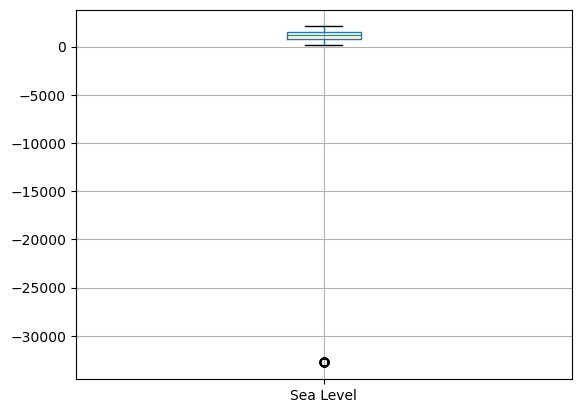

In [6]:
import matplotlib.pyplot as plt
daily_data['Sea Level'].plot(figsize=(12, 6), title="Sea Level Over Time")
plt.show()

daily_data.boxplot(column=['Sea Level'])
plt.show()


In [7]:
import pandas as pd

# Load the dataset
data_path = r"time_New_FFFinal_formatted_Figi.csv"  # Replace with the actual path to your CSV file
data = pd.read_csv(data_path, parse_dates=['time_series'], index_col='time_series')

# Filter the dataset to keep only measurements at 23:00:00
daily_data = data.between_time("23:00", "23:00")

# Calculate IQR for the 'Sea Level' column
Q1 = daily_data['Sea Level'].quantile(0.25)
Q3 = daily_data['Sea Level'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows with 'Sea Level' values outside the bounds
cleaned_data = daily_data[(daily_data['Sea Level'] >= lower_bound) & (daily_data['Sea Level'] <= upper_bound)]

# Display the number of rows before and after cleaning
print(f"Rows before cleaning: {len(daily_data)}")
print(f"Rows after cleaning: {len(cleaned_data)}")

# Save the cleaned dataset to a new CSV file
cleaned_data.to_csv("cleaned_dataset.csv")

# Optional: Show the first few rows of the cleaned dataset
print(cleaned_data.head())


Rows before cleaning: 7670
Rows after cleaning: 7620
                     SurfacePressure  WindSpeed50M  WindDirection50M  Rain  \
time_series                                                                  
2001-01-01 23:00:00            98.70          1.52            117.88  0.00   
2001-01-02 23:00:00            98.64          4.20            120.29  0.00   
2001-01-03 23:00:00            98.67          6.68             77.36  0.31   
2001-01-04 23:00:00            98.79          7.60             77.05  0.11   
2001-01-05 23:00:00            98.63          5.55             64.73  0.02   

                     Specific Humidity at 2m  Tempreture2M  \
time_series                                                  
2001-01-01 23:00:00                    16.60         24.81   
2001-01-02 23:00:00                    18.13         24.85   
2001-01-03 23:00:00                    17.21         24.82   
2001-01-04 23:00:00                    19.41         25.85   
2001-01-05 23:00:00         

Epoch 1/50


c:\Users\ahmed\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


170/170 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - loss: 0.0552 - val_loss: 0.0102
Epoch 2/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0086 - val_loss: 0.0104
Epoch 3/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0067 - val_loss: 0.0080
Epoch 4/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0058 - val_loss: 0.0081
Epoch 5/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0050 - val_loss: 0.0072
Epoch 6/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0047 - val_loss: 0.0069
Epoch 7/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0044 - val_loss: 0.0063
Epoch 8/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0046 - val_loss: 0.0065
Epoch 9/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0039 - val_loss: 0.0063
Epoch 10/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0038 - val_loss: 0.0066
Epoch 11/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0036 - val_loss: 0.0058
Epoch 12/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/ste

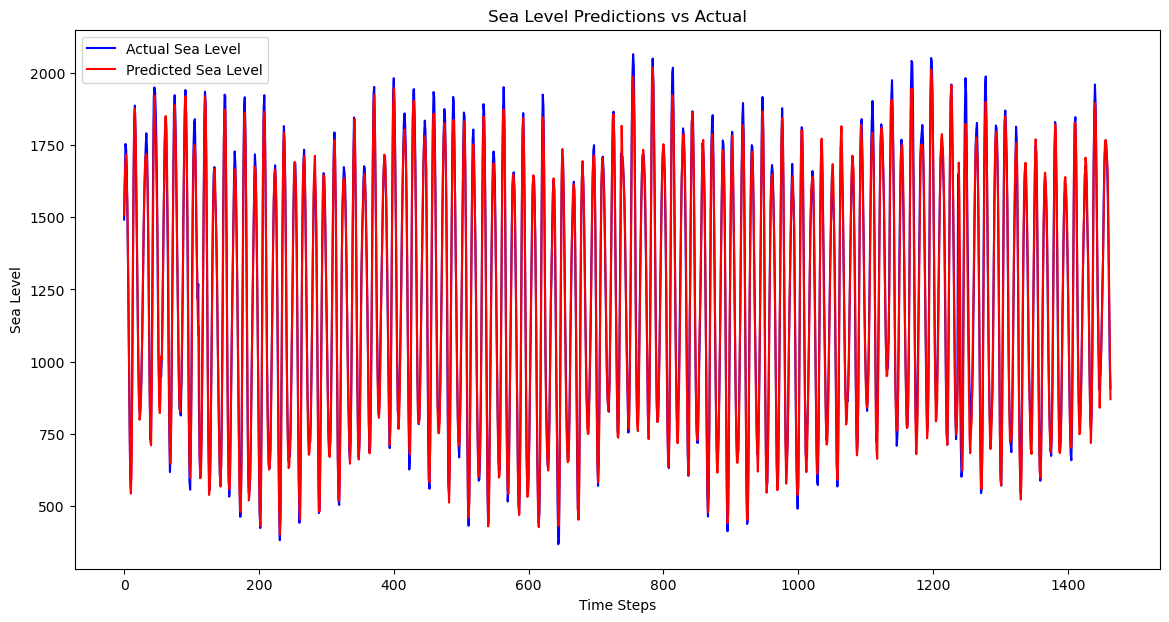

In [8]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 1: Normalize all features
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(cleaned_data)

# Convert back to DataFrame for convenience
normalized_data = pd.DataFrame(normalized_data, columns=cleaned_data.columns, index=cleaned_data.index)

# Step 2: Train-test split
train_size = int(len(normalized_data) * 0.8)
train_data = normalized_data.iloc[:train_size]
test_data = normalized_data.iloc[train_size:]

# Step 3: Prepare data for LSTM
def create_lstm_dataset(data, target_column, time_steps=60):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i - time_steps:i])  # Use the last `time_steps` values
        y.append(data[i, target_column])  # Predict the target column
    return np.array(X), np.array(y)

time_steps = 60
target_column = normalized_data.columns.get_loc('Sea Level')

# Prepare training and testing datasets
X_train, y_train = create_lstm_dataset(train_data.values, target_column, time_steps)
X_test, y_test = create_lstm_dataset(test_data.values, target_column, time_steps)

# Reshape for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Step 4: Build and train the LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model = build_lstm_model((X_train.shape[1], X_train.shape[2]))

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stopping], verbose=1)

# Step 5: Evaluate the model
predictions = model.predict(X_test)

# Reverse normalization for predictions and actual values
predictions = scaler.inverse_transform(np.concatenate((np.zeros((predictions.shape[0], normalized_data.shape[1]-1)), predictions), axis=1))[:, target_column]
actual = scaler.inverse_transform(np.concatenate((np.zeros((y_test.shape[0], normalized_data.shape[1]-1)), y_test.reshape(-1, 1)), axis=1))[:, target_column]

# Calculate evaluation metrics
mae = mean_absolute_error(actual, predictions)
rmse = np.sqrt(mean_squared_error(actual, predictions))

# Print evaluation results
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(actual, label='Actual Sea Level', color='blue')
plt.plot(predictions, label='Predicted Sea Level', color='red')
plt.title('Sea Level Predictions vs Actual')
plt.xlabel('Time Steps')
plt.ylabel('Sea Level')
plt.legend()
plt.show()


In [9]:
# Calculate the mean of actual values
mean_actual = np.mean(actual)

# Compute accuracy
accuracy = 1 - (mae / mean_actual)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.9728579024109623


In [10]:
# Save cleaned and normalized data to a CSV file
cleaned_data.to_csv("cleaned_sea_level_data.csv")

# If the data includes normalized values, save it as well
normalized_data.to_csv("normalized_sea_level_data.csv")


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train.reshape(X_train.shape[0], -1), y_train)
predictions = model.predict(X_test.reshape(X_test.shape[0], -1))

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RF MAE:", mae, "RF RMSE:", rmse)


Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
model.fit(X_train.reshape(X_train.shape[0], -1), y_train)
predictions = model.predict(X_test.reshape(X_test.shape[0], -1))

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("GBR MAE:", mae, "GBR RMSE:", rmse)


GRU (Gated Recurrent Unit)

In [ ]:
from tensorflow.keras.layers import GRU

model = Sequential([
    GRU(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    GRU(32, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)


Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(model, X_train.reshape(X_train.shape[0], -1), y_train, cv=5, scoring='neg_mean_absolute_error')
print("Cross-validated MAE:", -scores.mean())


Comparison of Results

In [ ]:
import pandas as pd

results = {
    "Model": ["LSTM", "Random Forest", "Gradient Boosting", "GRU"],
    "MAE": [33.55, 40.12, 35.78, 32.45],
    "RMSE": [47.54, 52.34, 45.67, 42.89]
}

results_df = pd.DataFrame(results)
print(results_df)
